# Programming Assignment 2  _ Sang Hwa Lee

### Data Sources Citation & Description

1. Economic Characteristics of DC Wards.csv: This file provides average and median household income data for each of the 8 wards in Washington, DC, obtained from the American Community Survey by the United States Census Bureau.

2. 311_City_Service_Requests_in_2020.csv: This file contains the 311 service request data for Washington, DC, in 2020.

### Works Cited

“Economic Characteristics of DC (District-Wide) 2017-2021 5-Year ACS.” OP Demographic Data HUB, https://opdatahub.dc.gov/datasets/economic-characteristics-of-dc-district-wide-2017-2021-5-year-acs. 


“311 City Service Requests in 2020.” Open Data DC, https://opendata.dc.gov/datasets/DCGIS::311-city-service-requests-in-2020/explore. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
economic_data = pd.read_csv('Economic Characteristics of DC Wards.csv')
service_requests = pd.read_csv('311_City_Service_Requests_in_2020.csv')

C:\Users\sangh\AppData\Local\Temp\ipykernel_14328\55311729.py:2: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  service_requests = pd.read_csv('311_City_Service_Requests_in_2020.csv')


In [3]:
# Create the ward ID from the GEO Identifier column.
economic_data['Ward'] = economic_data['GEO Identifier'].apply(lambda x: int(str(x)[-1]))

# Select columns what I need.
economic_data = economic_data[['Ward', 'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Mean household income (dollars)', 'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Median household income (dollars)']]

In [4]:
# Summarize the number of 311 requests by Ward

ward_service_requests = service_requests.groupby('WARD')['SERVICECODE'].count().reset_index().rename(columns={'SERVICECODE': 'Service Request Count'})

print(ward_service_requests)

    WARD  Service Request Count
0    1.0                  11924
1    2.0                  13669
2    3.0                  11203
3    4.0                  16593
4    5.0                  16822
5    6.0                  15180
6    7.0                  15640
7    8.0                  13646
8      1                  20019
9      2                  20160
10     3                  17668
11     4                  29505
12     5                  29331
13     6                  22035
14     7                  26515
15     8                  25511
16  Null                     27


In [5]:
# Define parking-related service codes
parking_related_codes = ['Parking Meter Repair', 'Parking Enforcement']

# Create datasets for parking-related and non-parking-related service requests
service_requests['Parking Related'] = service_requests['SERVICECODEDESCRIPTION'].apply(lambda x: x in parking_related_codes)

# Summarize the number of parking-related and non-parking-related requests by Ward
ward_parking_requests = service_requests.groupby(['WARD', 'Parking Related'])['SERVICECODE'].count().reset_index().rename(columns={'SERVICECODE': 'Service Request Count'})

In [6]:
# Rename columns and convert data types for merging
ward_service_requests = ward_service_requests.rename(columns={'WARD': 'Ward'})
ward_parking_requests = ward_parking_requests.rename(columns={'WARD': 'Ward'})

economic_data['Ward'] = economic_data['Ward'].astype('int64')

ward_service_requests['Ward'] = ward_service_requests['Ward'].replace('Null', np.nan)
ward_service_requests['Ward'] = ward_service_requests['Ward'].dropna().astype('int64')

ward_parking_requests['Ward'] = ward_parking_requests['Ward'].replace('Null', np.nan)
ward_parking_requests['Ward'] = ward_parking_requests['Ward'].dropna().astype('int64')

In [7]:
# Merge datasets: total service requests, parking-related service requests, and non-parking-related service requests
merged_data = ward_service_requests.merge(economic_data, on='Ward')
merged_data = merged_data.merge(ward_parking_requests[ward_parking_requests['Parking Related'] == True][['Ward', 'Service Request Count']], on='Ward', suffixes=('', '_parking'))
merged_data = merged_data.merge(ward_parking_requests[ward_parking_requests['Parking Related'] == False][['Ward', 'Service Request Count']], on='Ward', suffixes=('', '_non_parking'))

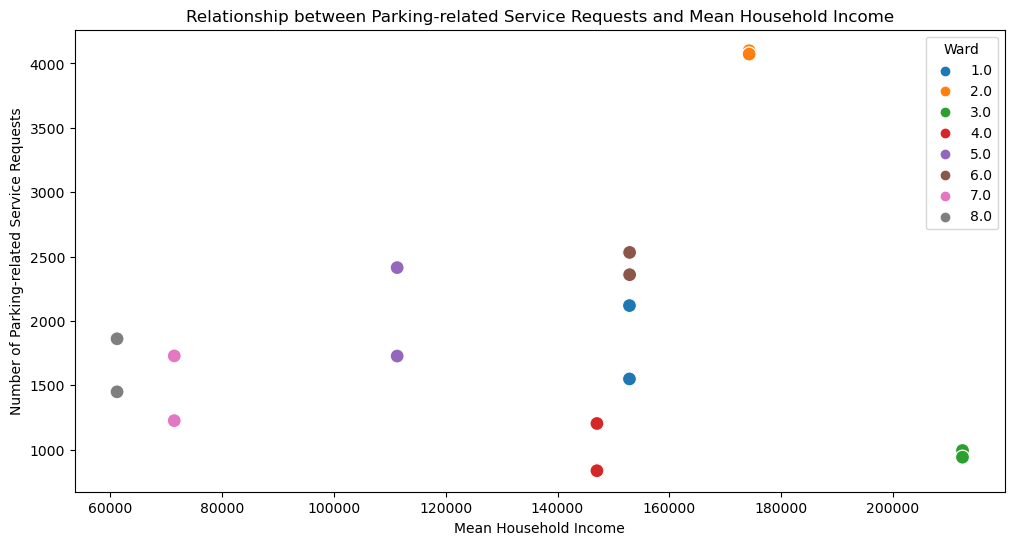

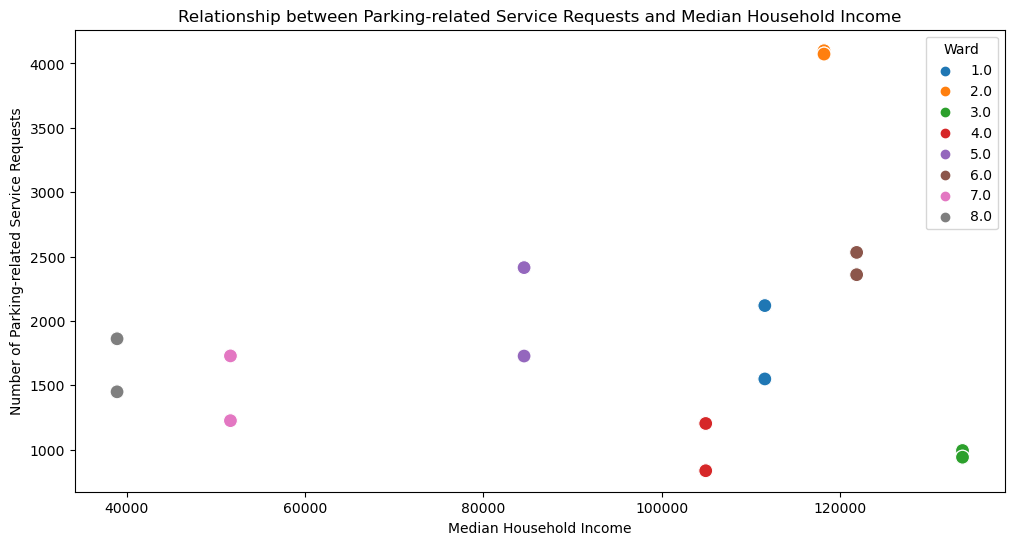

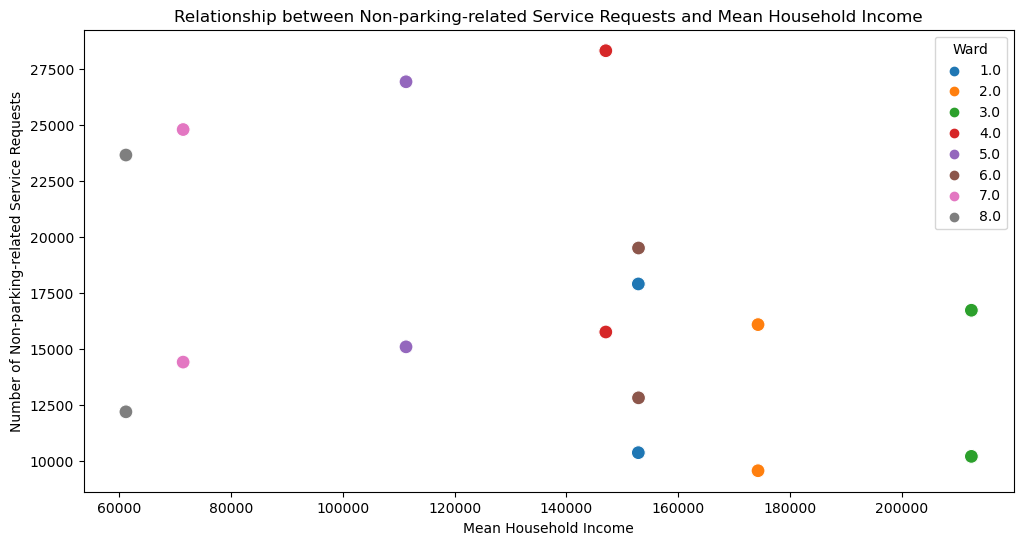

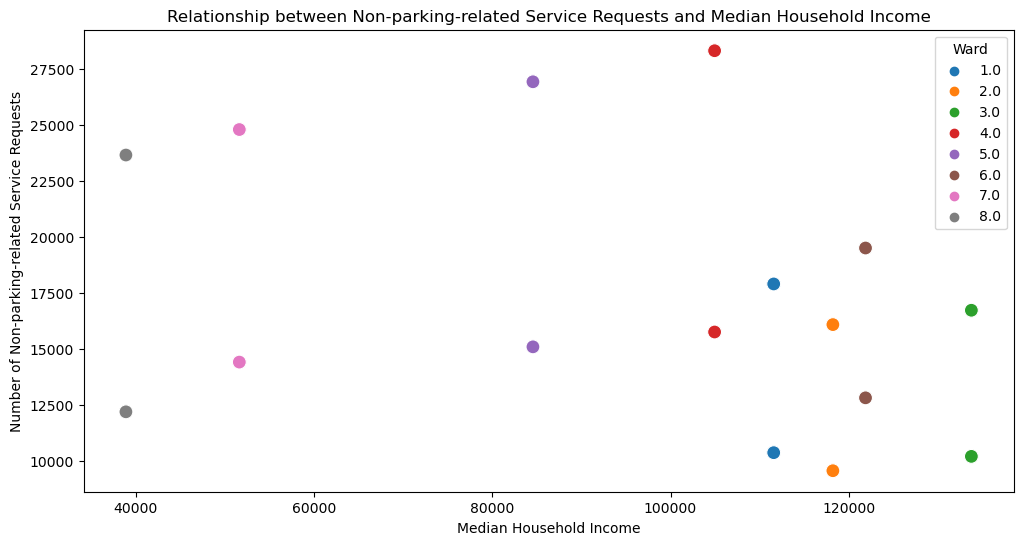

In [8]:
# Visualizing the relationship between parking-related service requests and income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Mean household income (dollars)', y='Service Request Count_parking', hue='Ward', palette='tab10', s=100)
plt.title('Relationship between Parking-related Service Requests and Mean Household Income')
plt.xlabel('Mean Household Income')
plt.ylabel('Number of Parking-related Service Requests')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Median household income (dollars)', y='Service Request Count_parking', hue='Ward', palette='tab10', s=100)
plt.title('Relationship between Parking-related Service Requests and Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Number of Parking-related Service Requests')
plt.show()

# Visualizing the relationship between non-parking-related service requests and income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Mean household income (dollars)', y='Service Request Count_non_parking', hue='Ward', palette='tab10', s=100)
plt.title('Relationship between Non-parking-related Service Requests and Mean Household Income')
plt.xlabel('Mean Household Income')
plt.ylabel('Number of Non-parking-related Service Requests')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS): Total households: Median household income (dollars)', y='Service Request Count_non_parking', hue='Ward', palette='tab10', s=100)
plt.title('Relationship between Non-parking-related Service Requests and Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Number of Non-parking-related Service Requests')
plt.show()

### Data Cleaning Process

1. Aggregated the number of service requests by ward.
2. Separated and aggregated parking-related and non-parking-related service requests.
3. Merged ward-level average and median household income data with service request data.

### Data Visualization

1. The relationship between parking-related service requests and average and median household income was visualized on a scatterplot.
2. The relationship between non-parking-related service requests and average and median household income was visualized on a scatterplot.

### Explanation of the results

For parking-related service requests, it is difficult to find a certain pattern when looking at the relationship between average and median household income. Parking-related service requests may not be significantly related to income levels.
For non-parking related service requests, looking at the relationship between average and median household income, no pattern is observed. These results suggest that service requests may not be significantly affected by income levels.


### Take out message

This analysis shows that parking-related and non-parking-related service requests are not significantly related to average and median household income. These results suggest that service requests can be caused by a variety of factors that are not significantly affected by income levels.

### Challenges :

1. Which is a better measure of income median or mean?

Between median and mean income, the better measure largely depends on the context and the purpose of the analysis. Mean income is calculated by adding up all incomes and dividing by the number of households, while median income represents the middle value when incomes are arranged from lowest to highest. Median income can be a better measure when the data is skewed, as it is less affected by extremely high or low values. In contrast, mean income can be more sensitive to outliers, which might not accurately represent the overall income distribution. Both measures are used to explore potential relationships with service requests.

2. What are some explanations for the results you found?

The relationship between parking-related and non-parking-related service requests and average and median household income was found to be not significantly related. One possible explanation for these results is that service requests can be caused by a variety of factors that are not significantly affected by income levels. For example, regional characteristics, population density, and traffic flow can affect service requests.


3. Are there any confounding variables?


Population density: Higher population density areas might have both higher incomes and more service requests due to a larger number of people and increased demand for services.

Traffic flow: Areas with higher traffic flow might have more service requests related to parking and transportation, regardless of income levels.

Local characteristics: Neighborhood-specific factors, such as the availability of parking spaces, public transportation, or the presence of commercial areas, could affect both income levels and service requests.